## Processo de Construção, Treinamento, Avaliação e Seleção de Modelos Para Classificação

Bilbiotecas, frameworks e outras ferramentas utilizdas:

- Numpy
- Pandas
- Matplotlib
- Seaborn
- Scikit-Learn (

Fonte de Dados: https://bitcoincharts.com/charts/

In [1]:
# Imports
import joblib
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

# Import algoritmos de machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Import métricas
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score

%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

## Carregando o conjundo de dados

In [2]:
dados = pd.read_csv('dataset.csv')

In [3]:
dados.shape

(583, 11)

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
dados.sample(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
166,55,Male,75.0,3.6,332,40,66,6.2,2.5,0.60,1
156,32,Male,0.9,0.3,462,70,82,6.2,3.1,1.00,1
27,34,Male,6.2,3.0,240,1680,850,7.2,4.0,1.20,1
182,65,Male,1.9,0.8,170,36,43,3.8,1.4,0.58,2
239,40,Male,0.9,0.3,196,69,48,6.8,3.1,0.80,1
572,32,Male,15.6,9.5,134,54,125,5.6,4.0,2.50,1
247,55,Male,0.9,0.2,190,25,28,5.9,2.7,0.80,1
80,58,Female,2.4,1.1,915,60,142,4.7,1.8,0.60,1
282,50,Male,0.7,0.2,188,12,14,7.0,3.4,0.90,1
115,50,Male,7.3,3.6,1580,88,64,5.6,2.3,0.60,2


## Análise Exploratória de Dados

In [6]:
dados.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [7]:
# Variáveis Categóricas
dados.dtypes[dados.dtypes == 'object']

Gender    object
dtype: object

In [8]:
dados.dtypes[dados.dtypes != 'object']

Age                             int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

## Exploração das Variáveis Numéricas

In [9]:
dados.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


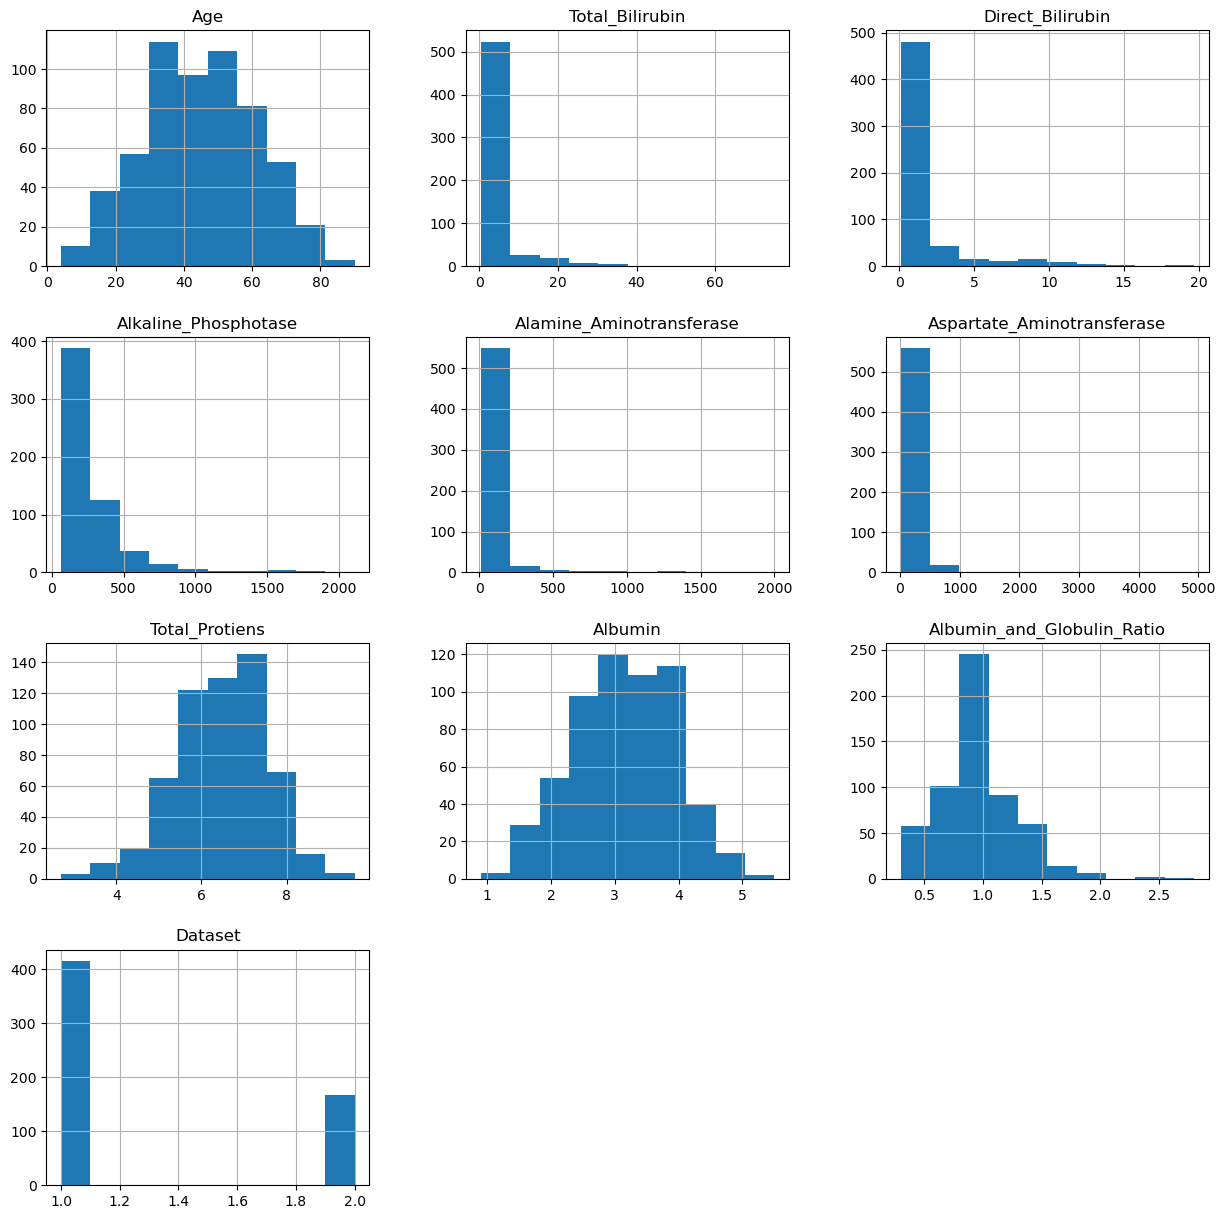

In [10]:
# plot
dados.hist(figsize = (15, 15), bins = 10)
plt.show()

Parece que há outlier nas variáveis **Alamine_Aminotransferase**, **Aspartate_Aminotransferase**, pois o valor máximo é muito mais alto que o valor médio.



A coluna dataset (variável target) tem '1' para doença hepática e '2' para nenhuma doença hepática. Vamos ajustar a variável colocando valores mais fáceis de interpretar. A classe negativa (não tem a doença) será zero.

In [11]:
# Função para ajustar a variável target
def ajusta_var(x):
    if x == 2:
        return 0
    return 1

In [12]:
# Aplica a função
dados['Dataset'] = dados['Dataset'].map(ajusta_var)

In [13]:
# Ajustanto o nome da variável para Target
dados.rename({'Dataset': 'Target'}, axis = 'columns', inplace = True)

In [14]:
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
411,23,Female,2.3,0.8,509,28,44,6.9,2.9,0.70,0
443,42,Female,0.7,0.2,152,35,81,6.2,3.2,1.06,1
498,68,Male,1.8,0.5,151,18,22,6.5,4.0,1.60,1
115,50,Male,7.3,3.6,1580,88,64,5.6,2.3,0.60,0
480,7,Male,0.5,0.1,352,28,51,7.9,4.2,1.10,0


In [15]:
# Correlação entre as variáveis
dados.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131
Target,0.137351,0.220208,0.246046,0.184866,0.163416,0.151934,-0.035008,-0.161388,-0.163131,1.000000


## Exploração da Variável Categórica

In [16]:
dados.describe(include = ['object'])

,Gender
count,583
unique,2
top,Male
freq,441


Número de pacientes do sexo masculino:  441
Número de pacientes do sexo feminino:  142


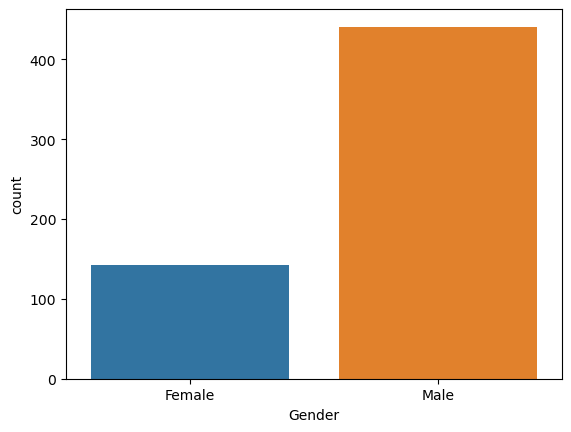

In [17]:
# plot 
sns.countplot(data = dados, x = 'Gender', label = 'Count')

# Value Counts
M, F = dados['Gender'].value_counts()

# Print
print('Número de pacientes do sexo masculino: ', M)
print('Número de pacientes do sexo feminino: ', F)

Vamos aproveitar e já transformar a variável categórica em sua representação numérica usando label encoding. Além de reduzir o trabalho mais tarde, facilitará a criação de gráficos a seguir.

In [18]:
def transform_var(x):
    if x == 'Male':
        return 0
    return 1

In [19]:
# Aplica a função
dados['Gender'] = dados['Gender'].map(transform_var)

In [20]:
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
143,30,0,1.6,0.4,332,84,139,5.6,2.7,0.90,1
188,60,0,1.9,0.8,614,42,38,4.5,1.8,0.60,1
132,18,1,0.8,0.2,199,34,31,6.5,3.5,1.16,0
262,18,0,0.8,0.2,228,55,54,6.9,4.0,1.30,1


## Verificando a Relação Entre Atributos

In [21]:
dados.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


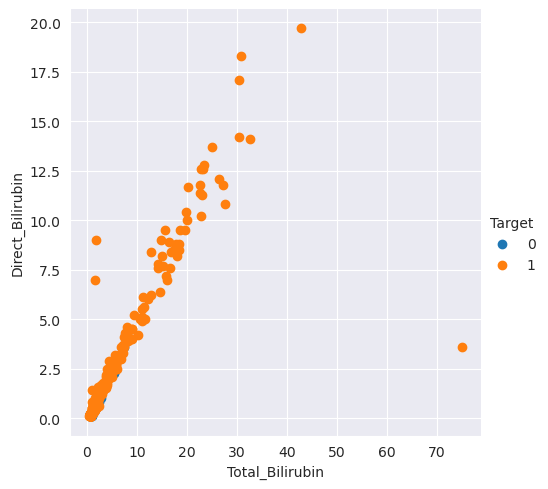

In [22]:
# Define o estilo do background
sns.set_style('darkgrid')

# Facetgrid
sns.FacetGrid(dados, hue = 'Target', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend();

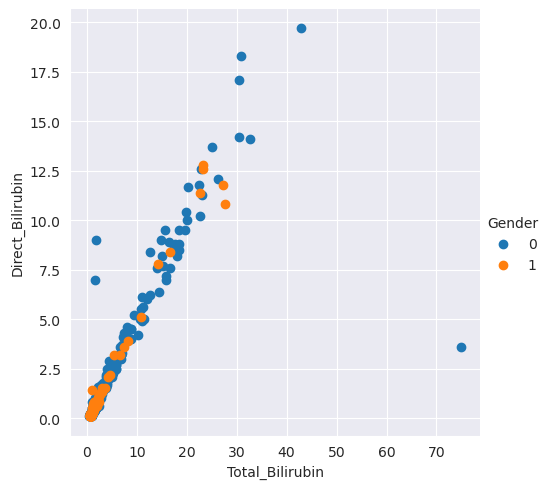

In [23]:
# Define o estilo do background
sns.set_style('darkgrid')

# Facetgrid
sns.FacetGrid(dados, hue = 'Gender', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend();

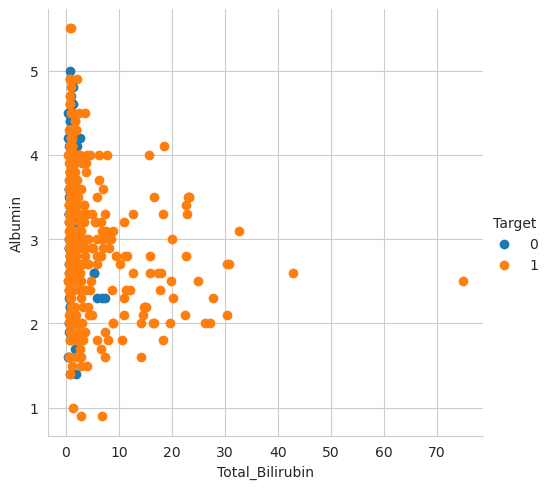

In [24]:
# Define o estilo do background
sns.set_style('whitegrid')

# Facetgrid
sns.FacetGrid(dados, hue = 'Target', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend();

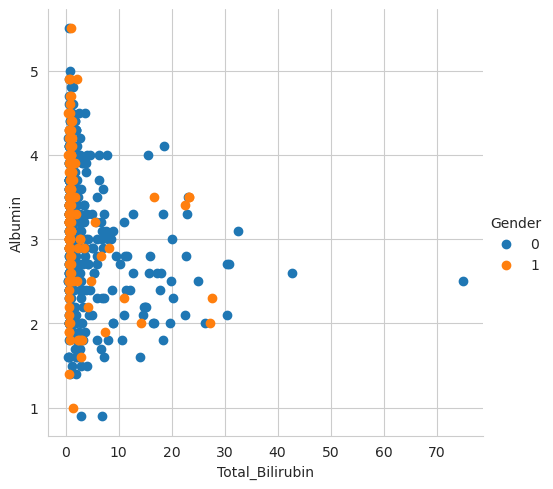

In [25]:
# Define o estilo do background
sns.set_style('whitegrid')

# Facetgrid
sns.FacetGrid(dados, hue = 'Gender', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend();

## Verificando Valores Ausentes e Registros Duplicados

In [26]:
# Verificando valores ausentes
dados[dados.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,0,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [27]:
# Verificando registros duplicados (complete cases)
dados[dados.duplicated(keep = False)]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
18,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
34,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
54,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1


## Limpeza de Dados

### Tratamento de Regustros Duplicados

In [28]:
dados.shape

(583, 11)

In [29]:
# Remove registros duplicados (remove uma das duplicatas)
dados = dados.drop_duplicates()
print(dados.shape)

(570, 11)


### Tratamento de Outliers

In [30]:
dados.describe()
# Comparar os valores méximos com as médias de cada variável

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,566.000000,570.000000
mean,44.849123,0.245614,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.948004,0.712281
std,16.242182,0.430829,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.319635,0.453097
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


<AxesSubplot:xlabel='Alamine_Aminotransferase'>

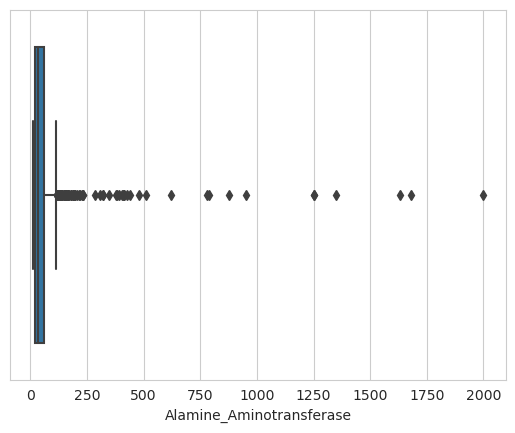

In [31]:
# Boxplot
sns.boxplot(dados['Alamine_Aminotransferase'])

Será que os valores extremos são mesmo outliers?

In [32]:
# Contagem de frequência por valor
dados['Alamine_Aminotransferase'].sort_values(ascending = False)

## Como são muitos pacientes com valor de 2000 vamos preservar assim e não remover

117    2000
27     1680
47     1630
118    1350
135    1250
       ... 
110      11
383      10
428      10
431      10
283      10
Name: Alamine_Aminotransferase, Length: 570, dtype: int64

<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

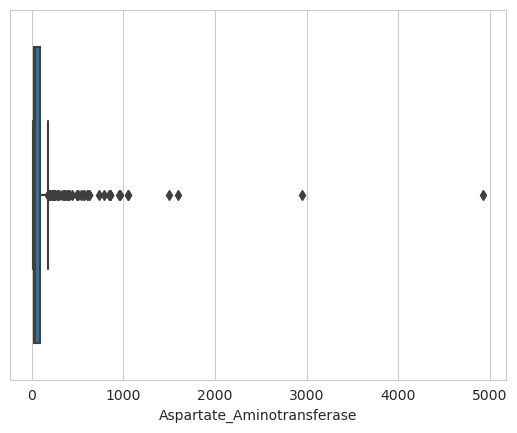

In [33]:
# Boxplot
sns.boxplot(dados['Aspartate_Aminotransferase'])

In [34]:
# Contagem de frequência por valor
dados['Aspartate_Aminotransferase'].sort_values(ascending = False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [35]:
## Como a diferença para a média agora é muito grande, vamos retirar os valores acima de 3000
dados = dados[dados['Aspartate_Aminotransferase'] <= 3000]
dados.shape

(569, 11)

<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

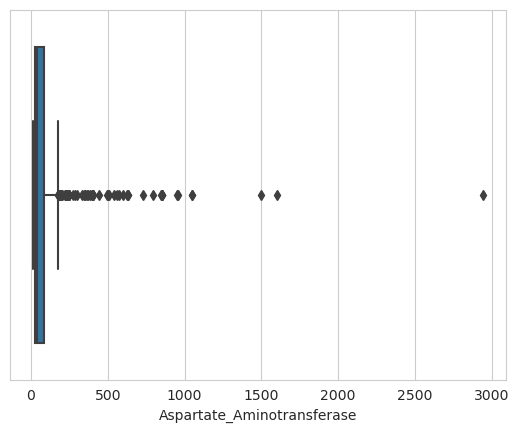

In [36]:
sns.boxplot(dados['Aspartate_Aminotransferase'])

In [37]:
## Agora Vamos filtrar por 2500, pois ainda há valores muito discrepantes
dados['Aspartate_Aminotransferase'].sort_values(ascending = False)

117    2946
118    1600
207    1500
119    1050
199    1050
       ... 
6        12
286      12
346      11
7        11
110      10
Name: Aspartate_Aminotransferase, Length: 569, dtype: int64

In [38]:
dados = dados[dados['Aspartate_Aminotransferase'] <= 2500]
dados.shape

(568, 11)

In [39]:
dados.describe()

# O valor máximo da variável agora é de 1600

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,564.000000,568.000000
mean,44.834507,0.246479,3.291197,1.482042,290.482394,74.286972,95.901408,6.496831,3.150000,0.948174,0.711268
std,16.237569,0.431340,6.257583,2.826056,243.271522,155.240601,171.956479,1.089500,0.797571,0.319301,0.453573
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,175.750000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.000000,86.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,1680.000000,1600.000000,9.600000,5.500000,2.800000,1.000000


## Tratamento de Valores Ausentes

In [40]:
# Verifica se há valor ausente
dados.isnull().values.any()

True

In [41]:
# Verifica quantas colunas tem valor ausente
dados.isnull().values.any().sum()

1

In [42]:
# Lista os valores ausentes
dados[dados.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,0,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [43]:
dados.shape

(568, 11)

In [44]:
# Drop dos registros com valores ausentes em qualquer coluna (any)
dados = dados.dropna(how = 'any')

In [45]:
dados.shape

(564, 11)

In [46]:
# Lista os valores ausentes
dados[dados.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target


In [47]:
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
139,15,0,0.8,0.2,380,25,66,6.1,3.7,1.5,1
530,22,1,1.1,0.3,138,14,21,7.0,3.8,1.1,0
252,65,0,1.1,0.3,258,48,40,7.0,3.9,1.2,0
386,38,0,2.7,1.4,105,25,21,7.5,4.2,1.2,0
86,13,0,0.6,0.1,320,28,56,7.2,3.6,1.0,0


## Pré-Processamento de Dados para Construção de Modelos de Machine Learning

In [48]:
# Data a alta correlação (multicolinearidade) entre as variáveis Direct_Bilirubin e Total_Bilirubin, vamos remover Direct_Bilirubin 
dados = dados.drop('Direct_Bilirubin', 1)

In [49]:
dados.shape

(564, 10)

### Divisão de Treino e Teste

In [50]:
# Cria um objeto separado para a variável Target
y = dados['Target']

In [51]:
# Cria um outro objeto com as variáveis de entrada
X = dados.drop('Target', 1)

In [52]:
# Split em dados de treino e teste com amostragem estratificada
X_treino, X_teste, y_treino, y_teste = train_test_split(X,
                                                        y,
                                                        test_size = 0.25,
                                                        random_state = 1234,
                                                        stratify = dados['Target'])

In [53]:
len(X_treino)

423

In [54]:
len(X_teste)

141

In [55]:
# Print do shape
print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)

(423, 9) (141, 9) (423,) (141,)


In [56]:
X_treino.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
205,45,0,2.5,163,28,22,7.6,4.0,1.1
390,72,0,0.8,148,23,35,6.0,3.0,1.0
137,18,0,0.8,282,72,140,5.5,2.5,0.8
54,42,0,8.9,272,31,61,5.8,2.0,0.5
502,42,0,0.8,127,29,30,4.9,2.7,1.2


## Balanceamento de Classe

In [57]:
y_treino.value_counts()

1    301
0    122
Name: Target, dtype: int64

In [58]:
# Instala o pacote
!pip install -q imblearn

In [59]:
# Carrega a função SMOTE
import imblearn
from imblearn.over_sampling import SMOTE

In [60]:
# Vamos aplicar a técnica de oversampling e aumentar o número de exemplos de classe minoritária
over_sampler = SMOTE(k_neighbors = 2)

O balanceamento de classe é feito somente nos dados de treino, pq é nele que criamos o modelo de aprendizado, e queremos ter o modelo mais generálizavel possível, que aprenda de forma igual sobre os diferentes valores da nossa variável target. Se aplicarmos nos dados de teste, estaremos influenciando no resultado do modelo.

In [61]:
# Aplica o oversampling (deve ser feito somente com dados de treino)
X_res, y_res = over_sampler.fit_resample(X_treino, y_treino)

In [62]:
len(X_res)

602

In [63]:
len(y_res)

602

In [64]:
# Ajusta os nomes do dataset de treino para x e y
X_treino = X_res
y_treino = y_res

## Padronização dos Dados

In [65]:
X_treino.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,45,0,2.5,163,28,22,7.6,4.0,1.1
1,72,0,0.8,148,23,35,6.0,3.0,1.0
2,18,0,0.8,282,72,140,5.5,2.5,0.8
3,42,0,8.9,272,31,61,5.8,2.0,0.5
4,42,0,0.8,127,29,30,4.9,2.7,1.2


In [66]:
# Calculamos a média e o desvio padrão nos dados de treino
treino_mean = X_treino.mean()
treino_std = X_treino.std()
print(treino_mean)
print(treino_std)

Age                            43.629568
Gender                          0.212625
Total_Bilirubin                 2.642302
Alkaline_Phosphotase          265.910299
Alamine_Aminotransferase       62.584718
Aspartate_Aminotransferase     77.262458
Total_Protiens                  6.554000
Albumin                         3.271180
Albumin_and_Globulin_Ratio      1.005427
dtype: float64
Age                            16.377940
Gender                          0.409504
Total_Bilirubin                 5.563307
Alkaline_Phosphotase          218.732155
Alamine_Aminotransferase      140.012789
Aspartate_Aminotransferase    144.145312
Total_Protiens                  1.021005
Albumin                         0.774532
Albumin_and_Globulin_Ratio      0.315133
dtype: float64


In [67]:
# Padronização
X_treino = (X_treino - treino_mean) / treino_std

In [68]:
X_treino.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.083675,-0.519224,-0.025579,-0.470485,-0.247011,-0.383380,1.024481,0.940981,0.300104
1,1.732234,-0.519224,-0.331152,-0.539062,-0.282722,-0.293193,-0.542602,-0.350122,-0.017222
2,-1.564883,-0.519224,-0.331152,0.073559,0.067246,0.435238,-1.032316,-0.995673,-0.651874
3,-0.099498,-0.519224,1.124816,0.027841,-0.225585,-0.112820,-0.738488,-1.641225,-1.603852
4,-0.099498,-0.519224,-0.331152,-0.635070,-0.239869,-0.327881,-1.619972,-0.737453,0.617430


In [69]:
X_treino.describe()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,602.000000,6.020000e+02,6.020000e+02,6.020000e+02
mean,8.262125e-17,-2.360607e-17,-2.360607e-17,-9.442428e-17,-2.360607e-17,0.000000,3.835987e-16,-5.547427e-16,-2.714698e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.419692e+00,-5.192241e-01,-4.030521e-01,-9.276656e-01,-3.755708e-01,-0.466630,-3.774712e+00,-3.061438e+00,-2.238504e+00
25%,-7.100751e-01,-5.192241e-01,-3.336345e-01,-4.201956e-01,-2.898644e-01,-0.369505,-6.405452e-01,-6.083423e-01,-6.518737e-01
50%,8.367547e-02,-5.192241e-01,-3.131775e-01,-3.104724e-01,-2.184423e-01,-0.286256,1.161104e-01,1.840366e-02,-1.722163e-02
75%,7.553106e-01,-5.192241e-01,-1.514032e-01,4.155631e-02,-7.024157e-02,-0.065992,6.679243e-01,8.118709e-01,6.174304e-01
max,2.831274e+00,1.922752e+00,1.300624e+01,8.430812e+00,1.155191e+01,10.563906,2.983335e+00,2.877636e+00,5.694647e+00


In [70]:
# Usamos média e desvio de treino para padronizar o conjunto de dados de teste
X_teste = (X_teste - treino_mean) / treino_std

In [71]:
X_teste.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
220,-0.404786,-0.519224,-0.331152,-0.543634,-0.254153,-0.216882,-1.522030,-0.995673,-0.017222
448,0.266849,1.922752,-0.331152,-0.566493,-0.261296,-0.362568,-0.542602,-0.866563,-0.969200
509,0.144733,-0.519224,3.120033,-0.054452,0.552916,3.210216,-1.130259,-0.350122,0.617430
415,1.610119,-0.519224,-0.241278,1.938854,0.217232,-0.258506,-2.893228,-0.737453,-0.969200
56,-0.649017,-0.519224,-0.331152,-0.310472,-0.261296,-0.376443,1.416252,0.940981,-0.017222


###  Construção, Treinamento e Avaliação do Modelo 1 com Regressão Logística (Benchmark)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Para a primeira versão do modelo o ideal é escolher um algoritmo simples, fácil de compreender e que será usado como Benchmark.

Obs: Como parte do processo envolve aleatoriedade, os resultados podem ser ligeiramente diferentes a cada execução deste jupyter notebook.

In [72]:
# Define a lista de hiperparâmetros
tuned_params_v1 = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                   'penalty': ['l1', 'l2']}

In [73]:
# Criaremos o modelo com GridSearch
# Vários modelos serão criados com diferentes combinações de hiperparâmetros
modelo_v1 = GridSearchCV(LogisticRegression(),
                        tuned_params_v1,
                        scoring = 'roc_auc',
                        n_jobs = -1)

In [74]:
# Treinamento do modelo
modelo_v1.fit(X_treino, y_treino)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [75]:
# Selecionamos o melhor modelo
modelo_v1.best_estimator_

LogisticRegression(C=10)

In [76]:
# Previsões com dados de teste
y_pred_v1 = modelo_v1.predict(X_teste)

In [77]:
# Mostra as 10 primeiras previsões
y_pred_v1[:10]

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [78]:
# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)

In [79]:
# Mostra as 10 primeiras previsões
y_pred_proba_v1[:10]

array([[7.44895141e-01, 2.55104859e-01],
       [4.93145416e-01, 5.06854584e-01],
       [3.57117471e-06, 9.99996429e-01],
       [7.25929242e-01, 2.74070758e-01],
       [6.94519681e-01, 3.05480319e-01],
       [6.76551929e-01, 3.23448071e-01],
       [7.46249072e-01, 2.53750928e-01],
       [6.65484070e-02, 9.33451593e-01],
       [5.49966814e-01, 4.50033186e-01],
       [2.30565779e-03, 9.97694342e-01]])

In [80]:
# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva
# Precisamos disso para calcular a Curva ROC
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)[:,1]

In [81]:
# Mostra as 10 primeiras previsões
y_pred_proba_v1[:10]

array([0.25510486, 0.50685458, 0.99999643, 0.27407076, 0.30548032,
       0.32344807, 0.25375093, 0.93345159, 0.45003319, 0.99769434])

In [82]:
# Como exemplo, vamos verificar um dos pontos de dados (altere o valor de i se desejar)
i = 14
print('Para o ponto de dado {}, classe real = {}, classe prevista  = {}, probabilidade prevista = {}'.
      format(i, y_teste.iloc[i], y_pred_v1[i], y_pred_proba_v1[i]))

Para o ponto de dado 14, classe real = 1, classe prevista  = 0, probabilidade prevista = 0.3818236804628857


In [83]:
# Matriz de Confusão
confusion_matrix(y_teste, y_pred_v1)

array([[31,  9],
       [40, 61]])

In [84]:
# Extraindo cada valor da CM
tn, fp, fn, tp = confusion_matrix(y_teste, y_pred_v1).ravel()

In [85]:
print(tn, fp, fn, tp)

31 9 40 61


In [86]:
# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsõoes em teste
roc_auc_v1 = roc_auc_score(y_teste, y_pred_v1)
print(roc_auc_v1)

0.6894801980198021


In [87]:
# Calcula a curva ROC com dados e previsões em teste
fpr_v1, tpr_v1, thresholds = roc_curve(y_teste, y_pred_proba_v1)

In [88]:
# Calcula a curva ROC com idados e previsões em teste
auc_v1 = auc(fpr_v1, tpr_v1)
print(auc_v1)

0.7363861386138614


In [89]:
# Acurácia em teste
acuracia_v1 = accuracy_score(y_teste, y_pred_v1)
print(acuracia_v1)

0.6524822695035462


## Feature Importance

In [90]:
# Construindo o modelo novamente com os melhores hiperparâmetros
# Isso é necessário pois a veroa final não deve ter o GridSearch
modelo_v1 = LogisticRegression(C = 10)
modelo_v1.fit(X_treino, y_treino)

LogisticRegression(C=10)

In [91]:
# Obtemos os coeficientes pelo maior usando np.argsort
indices = np.argsort(-abs(modelo_v1.coef_[0,:]))

In [92]:
print('Variaveis mais importantes para o resultado do modelo_v1:')
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variaveis mais importantes para o resultado do modelo_v1:
--------------------------------------------------
Total_Bilirubin
Aspartate_Aminotransferase
Albumin
Alamine_Aminotransferase
Total_Protiens
Alkaline_Phosphotase
Albumin_and_Globulin_Ratio
Gender
Age


In [93]:
# Salva o modelo e disco
with open('modelo_v1.pk1', 'wb') as pickle_file:
    joblib.dump(modelo_v1, 'modelo_v1.pk1')

In [94]:
# Cria um dataframe para receber as métricas de cada modelo
df_modelos = pd.DataFrame()

In [95]:
# Dicionário com as métricas do modelo_v1
dict_modelo_v1 = {'Nome': 'modelo_v1',
                  'Algoritmo': 'Regressão Logística',
                  'ROC_AUC Score': roc_auc_v1,
                  'AUC Score': auc_v1,
                  'Acuárcia': acuracia_v1}

In [96]:
# Adiciona o dict do dataframe
df_modelos = df_modelos.append(dict_modelo_v1, ignore_index = True)

In [97]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acuárcia
0,modelo_v1,Regressão Logística,0.68948,0.736386,0.652482


### Construção, Treinamento e Avaliação do Modelo 2 com Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Nosso desafio agora é tentar obter um modelo melhor que a versão 1. Vamos tentar o algoritmo Random Forest.

In [98]:
# Grid de hiperparâmetros
tuned_params_v2 = {'n_estimators': [100, 200, 300, 400, 500],
                   'min_samples_split': [2, 5, 10],
                   'min_samples_leaf': [1, 2, 4]}

In [99]:
# Cria o modelo com RandomizedSearchCV para buscar a melhot combinação de hiperparâmetros
modelo_v2 = RandomizedSearchCV(RandomForestClassifier(),
                              tuned_params_v2,
                              n_iter = 15,
                              scoring = 'roc_auc',
                              n_jobs = -1)

In [100]:
# Treina o modelo
modelo_v2.fit(X_treino, y_treino)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc')

In [101]:
# Extrai o melhor modelo
modelo_v2.best_estimator_

RandomForestClassifier(min_samples_split=5, n_estimators=300)

In [102]:
# Previsões em teste
y_pred_v2 = modelo_v2.predict(X_teste)

In [103]:
# Obtém as previsões para a classe positiva
y_pred_proba_v2 = modelo_v2.predict_proba(X_teste)[:,1]

In [104]:
# Matriz de Confusão
confusion_matrix(y_teste, y_pred_v2)

array([[19, 21],
       [18, 83]])

In [105]:
# Curva ROC nos dados e previsões em teste
roc_auc_v2 = roc_auc_score(y_teste, y_pred_v2)
print(roc_auc_v2)

0.6483910891089109


In [106]:
# Curva ROC nos dados e previsões em teste
fpr_v2, tpr_v2, thresholds = roc_curve(y_teste, y_pred_proba_v2)

In [107]:
# AUC em teste
auc_v2 = auc(fpr_v2, tpr_v2)
print(auc_v2)

0.747029702970297


In [108]:
# Acurácia em teste
acuracia_v2 = accuracy_score(y_teste, y_pred_v2)
print(acuracia_v2)

0.723404255319149


## Feature Importance

In [109]:
# Recria o modelo com os melhores hiperparâmetros
modelo_v2 = RandomForestClassifier(n_estimators = 200, min_samples_split = 5, min_samples_leaf = 4)
modelo_v2.fit(X_treino, y_treino)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

In [110]:
# Variáveis mais relevantes
indices = np.argsort(-modelo_v2.feature_importances_)
print('Variáveis mais importantes para o resultado do modelo_v2:')
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v2:
--------------------------------------------------
Total_Bilirubin
Alkaline_Phosphotase
Aspartate_Aminotransferase
Alamine_Aminotransferase
Albumin_and_Globulin_Ratio
Total_Protiens
Albumin
Age
Gender


In [111]:
# Salva o modelo em disco
with open('modelo_v2.pk1', 'wb') as pickle_file:
    joblib.dump(modelo_v2, 'modelo_v2.pk1')

In [112]:
# Dicionário com as métricas do modelo_v1
dict_modelo_v2 = {'Nome': 'modelo_v2',
                  'Algoritmo': 'Random Forest',
                  'ROC_AUC Score': roc_auc_v2,
                  'AUC Score': auc_v2,
                  'Acuárcia': acuracia_v2}

In [113]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v2, ignore_index = True)

In [114]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acuárcia
0,modelo_v1,Regressão Logística,0.689480,0.736386,0.652482
1,modelo_v2,Random Forest,0.648391,0.747030,0.723404


### Construção, Treinamento e Avaliação do Modelo 3 com KNN

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Vamos tentar agora um algoritmo mais simples, o KNN. Para esse algoritmo precisamos antes definir o valor de K, que é o número de vizinhos mais próximos.

In [115]:
# Lista de possíveis valores de K
vizinhos = list(range(1, 20, 2))

In [116]:
# Lista para os scores
cv_scores = []

In [117]:
# Validação cruzada para determinar o melhor valor de k
for k in vizinhos:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_treino, y_treino, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

In [118]:
# Ajustando o erro de classificação
erro = [1 - x for x in cv_scores]

In [119]:
# Determinando o melhor valor de k (com menor erro)
optimal_k = vizinhos[erro.index(min(erro))]
print('O valor ideal de K é de %d' % optimal_k)

O valor ideal de K é de 3


In [120]:
# Criamos o modelo versão 3
modelo_v3 = KNeighborsClassifier(n_neighbors = optimal_k)

In [121]:
# Treinamento 
modelo_v3.fit(X_treino, y_treino)

KNeighborsClassifier(n_neighbors=3)

In [122]:
# Previsões
y_pred_v3 = modelo_v3.predict(X_teste)

In [123]:
# Confusion Matrix
confusion_matrix(y_teste, y_pred_v3)

array([[20, 20],
       [41, 60]])

In [124]:
# Previsão de probabilidade de classe positiva
y_pred_proba_v3 = modelo_v3.predict_proba(X_teste)[:,1]

In [125]:
# Calcula ROC_AUC em teste
roc_auc_v3 = roc_auc_score(y_teste, y_pred_v3)
print(roc_auc_v3)

0.5470297029702971


In [126]:
# Calcula curva ROC
fpr_v3, tpr_v3, thresholds = roc_curve(y_teste, y_pred_proba_v3)

In [127]:
# Calcula AUC em teste
auc_v3 = auc(fpr_v3, tpr_v3)
print(auc_v3)

0.5902227722772276


In [128]:
# Calcula acurácia
acuracia_v3 = accuracy_score(y_teste, y_pred_v3)
print(acuracia_v3)

0.5673758865248227


OBS: Com o algoritmo KNN não extraímos as variáveis mais importantes, pois o conceito de algoritmo é diferente.

In [129]:
# Salva o modelo em disco
with open('modelo_v3.pk1', 'wb') as pickle_file:
    joblib.dump(modelo_v3, 'modelo_v3.pk1')

In [130]:
# Dicionário com as métricas do modelo_v1
dict_modelo_v3 = {'Nome': 'modelo_v3',
                  'Algoritmo': 'KNN',
                  'ROC_AUC Score': roc_auc_v3,
                  'AUC Score': auc_v3,
                  'Acuárcia': acuracia_v3}

In [131]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v3, ignore_index = True)

In [132]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acuárcia
0,modelo_v1,Regressão Logística,0.689480,0.736386,0.652482
1,modelo_v2,Random Forest,0.648391,0.747030,0.723404
2,modelo_v3,KNN,0.547030,0.590223,0.567376


### Construção, Treinamento e Avaliação do Modelo 4 com Decision Tree

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Na versão 4 do modelo usaremos um modelo de árvore de decisão.

In [133]:
# Grid de hiperparâmetros
tuned_params_v4 = {'min_samples_split': [2, 5, 10],
                   'min_samples_leaf': [1, 2, 4],
                   'max_depth': [2, 3, 4, 5, 6, 7]}

In [134]:
# Cria o modelo com RandomizedSearchCV para buscar a melhot combinação de hiperparâmetros
modelo_v4 = RandomizedSearchCV(DecisionTreeClassifier(),
                              tuned_params_v4,
                              n_iter = 15,
                              scoring = 'roc_auc',
                              n_jobs = -1)

In [135]:
# Treinamento
modelo_v4.fit(X_treino, y_treino)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   scoring='roc_auc')

In [136]:
# Melhor modelo
modelo_v4.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=10)

In [137]:
# Previsões de classe
y_pred_v4 = modelo_v4.predict(X_teste)

In [138]:
# Previsões de probabilidade
y_pred_proba_v4 = modelo_v4.predict_proba(X_teste)[:,1]

In [139]:
# Confusion matrix
confusion_matrix(y_teste, y_pred_v4)

array([[31,  9],
       [51, 50]])

In [140]:
# Calcula ROC_AUC em teste
roc_auc_v4 = roc_auc_score(y_teste, y_pred_v4)
print(roc_auc_v4)

0.6350247524752476


In [141]:
# Calcula curva ROC
fpr_v4, tpr_v4, thresholds = roc_curve(y_teste, y_pred_proba_v4)

In [142]:
# Calcula AUC em teste
auc_v4 = auc(fpr_v4, tpr_v4)
print(auc_v4)

0.6457920792079207


In [143]:
# Calcula acurácia
acuracia_v4 = accuracy_score(y_teste, y_pred_v4)
print(acuracia_v4)

0.574468085106383


## Feature Importance

In [144]:
# Recria o modelo com os melhores hiperparâmetros
modelo_v4 = RandomForestClassifier(n_estimators = 200, min_samples_split = 5, min_samples_leaf = 4)
modelo_v4.fit(X_treino, y_treino)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

In [145]:
# Variáveis mais relevantes modelo_v4
indices = np.argsort(-modelo_v4.feature_importances_)
print('Variáveis mais importantes para o resultado do modelo_v4:')
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v4:
--------------------------------------------------
Total_Bilirubin
Alkaline_Phosphotase
Aspartate_Aminotransferase
Albumin_and_Globulin_Ratio
Alamine_Aminotransferase
Total_Protiens
Age
Albumin
Gender


In [146]:
# Salva o modelo em disco
with open('modelo_v4.pk1', 'wb') as pickle_file:
    joblib.dump(modelo_v3, 'modelo_v4.pk1')

In [147]:
# Dicionário com as métricas do modelo_v1
dict_modelo_v4 = {'Nome': 'modelo_v4',
                  'Algoritmo': 'Descision Tree',
                  'ROC_AUC Score': roc_auc_v4,
                  'AUC Score': auc_v4,
                  'Acuárcia': acuracia_v4}

In [148]:
df_modelos = df_modelos.append(dict_modelo_v4, ignore_index = True)

In [149]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acuárcia
0,modelo_v1,Regressão Logística,0.689480,0.736386,0.652482
1,modelo_v2,Random Forest,0.648391,0.747030,0.723404
2,modelo_v3,KNN,0.547030,0.590223,0.567376
3,modelo_v4,Descision Tree,0.635025,0.645792,0.574468


### Construção, Treinamento e Avaliação do Modelo 5 com SVM

https://scikit-learn.org/stable/modules/svm.html

Para a quinta e última versão do modelo usaremos SVM.

In [150]:
# Função para seleção de hiperparâmetros
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv = nfolds)
    grid_search.fit(X_treino, y_treino)
    grid_search.best_params_
    return grid_search.best_params_

In [151]:
# Aplica a função
svc_param_selection(X_treino, y_treino, 5)

{'C': 10, 'gamma': 1}

In [152]:
# Cria o modelo com os melhores hipeparâmetros
modelo_v5 = SVC(C = 1, gamma = 1, probability = True)

In [153]:
# Treinamento
modelo_v5.fit(X_treino, y_treino)

SVC(C=1, gamma=1, probability=True)

In [154]:
# Previsões de classe
y_pred_v5 = modelo_v5.predict(X_teste)

In [155]:
confusion_matrix(y_teste, y_pred_v5)

array([[20, 20],
       [31, 70]])

In [156]:
# Previsões de probabilidade
y_pred_proba_v5 = modelo_v5.predict_proba(X_teste)[:, 1]

In [157]:
# Calcula ROC_AUC em teste
roc_auc_v5 = roc_auc_score(y_teste, y_pred_v5)
print(roc_auc_v5)

0.5965346534653465


In [158]:
# Calcula curva ROC
fpr_v5, tpr_v5, thresholds = roc_curve(y_teste, y_pred_proba_v5)

In [159]:
# Calcula AUC em teste
auc_v5 = auc(fpr_v5, tpr_v5)
print(auc_v5)

0.628960396039604


In [160]:
# Calcula acurácia
acuracia_v5 = accuracy_score(y_teste, y_pred_v5)
print(acuracia_v5)

0.6382978723404256


In [161]:
# Salva o modelo em disco
with open('modelo_v5.pk1', 'wb') as pickle_file:
    joblib.dump(modelo_v5, 'modelo_v5.pk1')

In [162]:
# Dicionário com as métricas do modelo_v1
dict_modelo_v5 = {'Nome': 'modelo_v5',
                  'Algoritmo': 'SVN',
                  'ROC_AUC Score': roc_auc_v5,
                  'AUC Score': auc_v5,
                  'Acuárcia': acuracia_v5}

In [163]:
df_modelos = df_modelos.append(dict_modelo_v5, ignore_index = True)

In [164]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acuárcia
0,modelo_v1,Regressão Logística,0.689480,0.736386,0.652482
1,modelo_v2,Random Forest,0.648391,0.747030,0.723404
2,modelo_v3,KNN,0.547030,0.590223,0.567376
3,modelo_v4,Descision Tree,0.635025,0.645792,0.574468
4,modelo_v5,SVN,0.596535,0.628960,0.638298


## Seleção do Melhor Modelo

In [166]:
# Usaremos o modelo que teve a maior AUC Score, por se tratar de uma mátrica global
# O score AUC é o ideal para comparar modelos de diferentes algoritmos
df_melhor_modelo = df_modelos[df_modelos['AUC Score'] == df_modelos['AUC Score'].max()]

In [167]:
df_melhor_modelo

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acuárcia
1,modelo_v2,Random Forest,0.648391,0.74703,0.723404


## Previsões com o Melhor Modelo Treinado


In [169]:
# Obtemos o nome do melhor modelo
modelo = df_melhor_modelo.Nome.to_string(index = False)
modelo

'modelo_v2'

In [170]:
# Carregamos o melhor modelo do disco
melhor_modelo = joblib.load(modelo + '.pk1')
melhor_modelo

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

In [171]:
dados.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Target'],
      dtype='object')

In [172]:
# Dados brunos de um novo paciente
# O número de colunas deve ser o mesmo do que foi usado em treino
novo_paciente = [72, 1, 0.8, 186, 15, 29, 7.1, 3.4, 0.9]

In [173]:
# Converte o objeto para array
arr_paciente = np.array(novo_paciente)

In [174]:
# Usamos a média e o desvio padrão de treino para padronizar novos dados
arr_paciente = (arr_paciente - treino_mean) / treino_std

In [175]:
# Converte o objeto para array
arr_paciente = np.array(arr_paciente)

In [176]:
# Dados do paciente padronizados (exatamente como o modelo espera receber os dados)
arr_paciente

array([ 1.73223442,  1.92275158, -0.33115242, -0.36533403, -0.33985979,
       -0.33481809,  0.53476745,  0.16631942, -0.33454768])

In [177]:
# É necessário fazer o reshape
# Previsões de classe
pred_novo_paciente = melhor_modelo.predict(arr_paciente.reshape(1, -1))

In [180]:
# Verifica o valor e imprime o resultado final
if pred_novo_paciente == 1:
    print('Este paciente deve apresentar doença hepática!')
else:
    print('Este paciente não deve apresentar doença hepática')

Este paciente deve apresentar doença hepática!
